**body level classification**
-   Gender: Male or female.
-   Age: Numeric value.
-   Height: Numeric value (in meters).
-   Weight: Numeric value (in kilograms).
-   Fam_Hist: Does the family have a history with obesity?
-   H_Cal_Consump: High caloric food consumption.
-   Veg_Consump: Frequency of vegetables consumption.
-   Meal_Count: Average number of meals per day.
-   Food_Between_Meals: Frequency of eating between meals.
-   Smoking: Is the person smoking?
-   Water_Consump: Frequency of water consumption.
-   H_Cal_Burn: Does the body have high calories burn rate?
-   Phys_Act: How often does the person do physical activities?
-   Time_E_Dev: How much time does person spend on electronic devices.
-   Alcohol_Consump: Frequency of alcohols consumption.
-   Transport: Which transports does the person usually use?
-   Body_Level: Class of human body level.


here we import libraries we will use them

In [157]:
%matplotlib inline
%config inlineBackend.figure_formats = ['svg']
# Import from Libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import scipy.stats as stat
import pylab


from sklearn.decomposition import PCA


from sklearn.metrics import classification_report


from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
# Dataset view settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 90)

those some function help us to analysis data 


In [158]:
def plots_helper(column): # calculating the IQR to detrmine the exact number of outliers in each feature and skewness
    Q3 = np.quantile(column, 0.75)
    Q1 = np.quantile(column, 0.25)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    oc = len(column[column>upper_range]) + len(column[column<lower_range])
    percent = round((oc/len(column))*100,2)
    sk = round(stat.skew(column),2)
    return oc , percent , sk

In [159]:
def box_dist_prob_plots(df): # BoxPlot , Distribution, Histogram and ProbabilityPlot
    number_features = len(df.columns)
    
    plt.figure(figsize = (25,number_features*6))
    for column,i in zip(df,range(1,number_features*3+1,3)):
        
        # coalculating the outliers and its percentage
            
        oc , percent , sk = plots_helper(df[column])

        # plotting the 3 diagrams for each feature
        plt.subplot(number_features, 3, i)
        sns.boxplot(df[column])
        plt.xlabel(column, size=14)
        plt.title(f'Number of outliers {oc} ({percent}%)', fontsize=12, color ='red', fontweight = 'bold')
        
        plt.subplot(number_features, 3, i+1)
        sns.distplot(df[column],kde=False)
        plt.title(f'Skewness = {sk}', fontsize=12, color ='red', fontweight = 'bold')
        plt.xlabel(column, size=14)
        plt.ylabel("Count", size=14)
        plt.axvline(x=df[column].median(),ls='--')
        plt.axvline(x=df[column].mean())
        plt.legend(['mean', 'median'])
        
        plt.subplot(number_features, 3, i+2)
        stat.probplot(df[column],dist='norm',plot=pylab,rvalue=True)
        

In [160]:
def box_for_one_col(column,name):
    oc , percent , sk = plots_helper(column)

    # plotting the 3 diagrams for each feature
    plt.subplot(1, 3, 1)
    sns.boxplot(column)
    plt.xlabel(name, size=14)
    plt.title(f'Number of outliers {oc} ({percent}%)', fontsize=12, color ='red', fontweight = 'bold')
    
    plt.subplot(1, 3, 2)
    sns.distplot(column,kde=False)
    plt.title(f'Skewness = {sk}', fontsize=12, color ='red', fontweight = 'bold')
    plt.xlabel(name, size=14)
    plt.ylabel("Count", size=14)
    plt.axvline(x=column.median(),ls='--')
    plt.axvline(x=column.mean())
    plt.legend(['mean', 'median'])
    
    plt.subplot(1, 3, 3)
    stat.probplot(column,dist='norm',plot=pylab,rvalue=True)

read data

In [161]:
df = pd.read_csv('body_level_classification.csv')


see sample from it

In [162]:
df.sample(5)

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
536,Male,20.000000,1.817480,85.000000,yes,2.951180,3.000000,Sometimes,no,3.000000,Sometimes,yes,no,2.433918,0.561602,Public_Transportation,Body Level 3
982,Female,26.000000,1.622701,109.982692,yes,3.000000,2.688229,Sometimes,no,3.000000,Sometimes,yes,no,0.000000,0.451377,Public_Transportation,Body Level 4
1163,Male,20.580984,1.798354,103.705418,yes,2.000000,2.401315,no,no,3.000000,Sometimes,yes,no,2.891986,0.000000,Public_Transportation,Body Level 4
774,Female,16.941489,1.551288,54.932420,yes,1.753750,2.000000,Sometimes,no,1.296156,Sometimes,no,yes,0.110174,1.944675,Public_Transportation,Body Level 3
178,Female,22.926352,1.715597,50.000000,yes,2.449267,1.266018,no,no,3.647154,Frequently,yes,no,0.866045,0.097234,Public_Transportation,Body Level 1


here we see non null data but may be weight or height =0 and this will be null also so we need check that 

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              1477 non-null   object 
 1   Age                 1477 non-null   float64
 2   Height              1477 non-null   float64
 3   Weight              1477 non-null   float64
 4   H_Cal_Consump       1477 non-null   object 
 5   Veg_Consump         1477 non-null   float64
 6   Water_Consump       1477 non-null   float64
 7   Alcohol_Consump     1477 non-null   object 
 8   Smoking             1477 non-null   object 
 9   Meal_Count          1477 non-null   float64
 10  Food_Between_Meals  1477 non-null   object 
 11  Fam_Hist            1477 non-null   object 
 12  H_Cal_Burn          1477 non-null   object 
 13  Phys_Act            1477 non-null   float64
 14  Time_E_Dev          1477 non-null   float64
 15  Transport           1477 non-null   object 
 16  Body_L

In [164]:
df.shape

(1477, 17)

from this function we see min for height 1.4 not 0 and weight also so we are fine.

Phys_Act	Time_E_Dev   those columns min are 0 and that is normal 

In [165]:
df.describe()

,Age,Height,Weight,Veg_Consump,Water_Consump,Meal_Count,Phys_Act,Time_E_Dev
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,24.290420,1.701602,86.542290,2.421912,2.005120,2.682104,1.023106,0.650672
std,6.323081,0.094654,26.278277,0.540711,0.620307,0.790751,0.844840,0.605199
min,15.000000,1.456346,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.895877,1.629194,65.000000,2.000000,1.549931,2.644692,0.145687,0.000000
50%,22.720449,1.701284,82.636162,2.416044,2.000000,3.000000,1.000000,0.616045
75%,26.000000,1.770278,106.690530,3.000000,2.482933,3.000000,1.672639,1.000000
max,55.246250,1.980000,173.000000,3.000000,3.000000,4.000000,3.000000,2.000000


In [168]:
df.sample(5)

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
1468,Female,21.521294,1.803677,160.639405,yes,3.000000,2.404049,Sometimes,no,3.0,Sometimes,yes,no,0.427905,0.639894,Public_Transportation,Body Level 4
818,Male,28.255199,1.816547,120.699119,yes,2.997951,2.715856,Sometimes,no,3.0,Sometimes,yes,no,0.739881,0.972054,Automobile,Body Level 4
877,Female,21.760734,1.735810,135.346677,yes,3.000000,2.611654,Sometimes,no,3.0,Sometimes,yes,no,1.618512,0.868788,Public_Transportation,Body Level 4
676,Male,28.391240,1.810060,87.286783,yes,3.000000,1.205633,no,no,3.0,Sometimes,no,no,2.000000,0.000000,Automobile,Body Level 3
372,Female,18.000000,1.560000,51.000000,yes,2.000000,2.000000,Sometimes,no,4.0,Frequently,yes,no,1.000000,0.000000,Public_Transportation,Body Level 2


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 203 to 1126
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              1329 non-null   object 
 1   Age                 1329 non-null   float64
 2   Height              1329 non-null   float64
 3   Weight              1329 non-null   float64
 4   H_Cal_Consump       1329 non-null   object 
 5   Veg_Consump         1329 non-null   float64
 6   Water_Consump       1329 non-null   float64
 7   Alcohol_Consump     1329 non-null   object 
 8   Smoking             1329 non-null   object 
 9   Meal_Count          1329 non-null   float64
 10  Food_Between_Meals  1329 non-null   object 
 11  Fam_Hist            1329 non-null   object 
 12  H_Cal_Burn          1329 non-null   object 
 13  Phys_Act            1329 non-null   float64
 14  Time_E_Dev          1329 non-null   float64
 15  Transport           1329 non-null   object 
 16  Body

count duplicate rows

In [170]:
df.duplicated().sum()

11

show duplicate rows

In [171]:
df[df.duplicated()]

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
438,Male,21.0,1.62,70.0,yes,2.0,3.0,Sometimes,no,1.0,no,no,no,1.0,0.0,Public_Transportation,Body Level 3
461,Male,21.0,1.62,70.0,yes,2.0,3.0,Sometimes,no,1.0,no,no,no,1.0,0.0,Public_Transportation,Body Level 3
302,Female,18.0,1.62,55.0,yes,2.0,1.0,no,no,3.0,Frequently,yes,no,1.0,1.0,Public_Transportation,Body Level 2
475,Male,21.0,1.62,70.0,yes,2.0,3.0,Sometimes,no,1.0,no,no,no,1.0,0.0,Public_Transportation,Body Level 3
417,Male,21.0,1.62,70.0,yes,2.0,3.0,Sometimes,no,1.0,no,no,no,1.0,0.0,Public_Transportation,Body Level 3
119,Female,21.0,1.52,42.0,yes,3.0,1.0,Sometimes,no,1.0,Frequently,no,no,0.0,0.0,Public_Transportation,Body Level 1
17,Female,21.0,1.52,42.0,yes,3.0,1.0,Sometimes,no,1.0,Frequently,no,no,0.0,0.0,Public_Transportation,Body Level 1
207,Female,22.0,1.69,65.0,yes,2.0,2.0,Sometimes,no,3.0,Sometimes,yes,no,1.0,1.0,Public_Transportation,Body Level 2
146,Female,21.0,1.52,42.0,no,3.0,1.0,Sometimes,no,1.0,Frequently,no,no,0.0,0.0,Public_Transportation,Body Level 1
391,Male,21.0,1.62,70.0,yes,2.0,3.0,Sometimes,no,1.0,no,no,no,1.0,0.0,Public_Transportation,Body Level 3


delete them

In [172]:
df=df.drop_duplicates()

check if deleted

In [173]:
df.duplicated().sum()

0

In [174]:
df[df.duplicated()]

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level


here another way to check null 

In [175]:
df.isnull().sum()

Gender                0
Age                   0
Height                0
Weight                0
H_Cal_Consump         0
Veg_Consump           0
Water_Consump         0
Alcohol_Consump       0
Smoking               0
Meal_Count            0
Food_Between_Meals    0
Fam_Hist              0
H_Cal_Burn            0
Phys_Act              0
Time_E_Dev            0
Transport             0
Body_Level            0
dtype: int64

here we analysis columns category to body level 

we notice alchol always category is always 2 that is problem i think

In [176]:
for col in df.select_dtypes(include='object') :
    print(col)
    print(df.groupby(col)['Body_Level'].value_counts(normalize=True)*100)
    print('---------------------------')

Gender
Gender  Body_Level  
Female  Body Level 4    45.679012
        Body Level 3    23.765432
        Body Level 1    16.666667
        Body Level 2    13.888889
Male    Body Level 4    47.611940
        Body Level 3    30.000000
        Body Level 2    13.283582
        Body Level 1     9.104478
Name: Body_Level, dtype: float64
---------------------------
H_Cal_Consump
H_Cal_Consump  Body_Level  
no             Body Level 3    38.926174
               Body Level 2    36.912752
               Body Level 1    17.449664
               Body Level 4     6.711409
yes            Body Level 4    51.753636
               Body Level 3    25.406330
               Body Level 1    12.232678
               Body Level 2    10.607357
Name: Body_Level, dtype: float64
---------------------------
Alcohol_Consump
Alcohol_Consump  Body_Level  
Always           Body Level 2    100.000000
Frequently       Body Level 3     48.888889
                 Body Level 4     26.666667
                 Body Level 2 

oh same i said above there is problem, i have 1 only in data set always drink alchol

In [177]:
sum(np.where(df["Alcohol_Consump"]=="Always",1,0))

1

remove this row

In [178]:
df.drop(index=df[df["Alcohol_Consump"]=="Always"].index,inplace=True)

In [179]:
sum(np.where(df["Alcohol_Consump"]=="Always",1,0))

0

here we label encode body level

In [180]:
print(df['Body_Level'][:10])
numeric_var = {"Body_Level": {"Body Level 1":0, "Body Level 2":1, "Body Level 3":2, "Body Level 4":3}}
df = df.replace(numeric_var)
print(df['Body_Level'][:10])

203     Body Level 2
175     Body Level 1
101     Body Level 1
107     Body Level 1
962     Body Level 4
1035    Body Level 4
867     Body Level 4
787     Body Level 3
893     Body Level 4
1078    Body Level 4
Name: Body_Level, dtype: object
203     1
175     0
101     0
107     0
962     3
1035    3
867     3
787     2
893     3
1078    3
Name: Body_Level, dtype: int64


Here we first see correlation between all columns and notice 
relation between body level and weight so high , i have now information i will use it before training 

In [181]:
df.corr()

,Age,Height,Weight,Veg_Consump,Water_Consump,Meal_Count,Phys_Act,Time_E_Dev,Body_Level
Age,1.000000,-0.028132,0.201868,0.038436,-0.041372,-0.079691,-0.126034,-0.287015,0.331750
Height,-0.028132,1.000000,0.449944,-0.033422,0.233290,0.241771,0.303691,0.032560,0.111500
Weight,0.201868,0.449944,1.000000,0.220189,0.219492,0.072676,-0.051231,-0.085885,0.840984
Veg_Consump,0.038436,-0.033422,0.220189,1.000000,0.088711,0.031368,0.020887,-0.113230,0.088788
Water_Consump,-0.041372,0.233290,0.219492,0.088711,1.000000,0.087783,0.173316,0.016108,0.135733
Meal_Count,-0.079691,0.241771,0.072676,0.031368,0.087783,1.000000,0.152827,0.018975,-0.105618
Phys_Act,-0.126034,0.303691,-0.051231,0.020887,0.173316,0.152827,1.000000,0.059064,-0.177474
Time_E_Dev,-0.287015,0.032560,-0.085885,-0.113230,0.016108,0.018975,0.059064,1.000000,-0.124552
Body_Level,0.331750,0.111500,0.840984,0.088788,0.135733,-0.105618,-0.177474,-0.124552,1.000000


now make all category columns numerical by get dummies function which convert col category to columns = # of categories of this col

In [182]:
df=pd.get_dummies(df)


see samples

In [183]:
df.sample(5)

,Age,Height,Weight,Veg_Consump,Water_Consump,Meal_Count,Phys_Act,Time_E_Dev,Body_Level,Gender_Female,Gender_Male,H_Cal_Consump_no,H_Cal_Consump_yes,Alcohol_Consump_Frequently,Alcohol_Consump_Sometimes,Alcohol_Consump_no,Smoking_no,Smoking_yes,Food_Between_Meals_Always,Food_Between_Meals_Frequently,Food_Between_Meals_Sometimes,Food_Between_Meals_no,Fam_Hist_no,Fam_Hist_yes,H_Cal_Burn_no,H_Cal_Burn_yes,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking
108,21.798856,1.672007,49.980968,2.979383,2.975887,3.000000,0.945093,1.241755,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0
1066,20.796266,1.796538,152.473675,3.000000,2.322003,3.000000,0.886602,0.843283,3,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0
581,18.000000,1.456346,55.523481,2.000000,1.040342,3.000000,0.497373,1.783319,2,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0
347,19.000000,1.800000,60.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0
452,19.627000,1.815409,85.302146,2.987148,2.359246,3.483449,2.060415,0.598999,2,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0


In [184]:
df.columns

Index(['Age', 'Height', 'Weight', 'Veg_Consump', 'Water_Consump', 'Meal_Count',
       'Phys_Act', 'Time_E_Dev', 'Body_Level', 'Gender_Female', 'Gender_Male',
       'H_Cal_Consump_no', 'H_Cal_Consump_yes', 'Alcohol_Consump_Frequently',
       'Alcohol_Consump_Sometimes', 'Alcohol_Consump_no', 'Smoking_no',
       'Smoking_yes', 'Food_Between_Meals_Always',
       'Food_Between_Meals_Frequently', 'Food_Between_Meals_Sometimes',
       'Food_Between_Meals_no', 'Fam_Hist_no', 'Fam_Hist_yes', 'H_Cal_Burn_no',
       'H_Cal_Burn_yes', 'Transport_Automobile', 'Transport_Bike',
       'Transport_Motorbike', 'Transport_Public_Transportation',
       'Transport_Walking'],
      dtype='object')

here we plot every columns to see outliers and feature distrbution

we notice we have some columns have outliers but before solve them we will try run them first in some models 

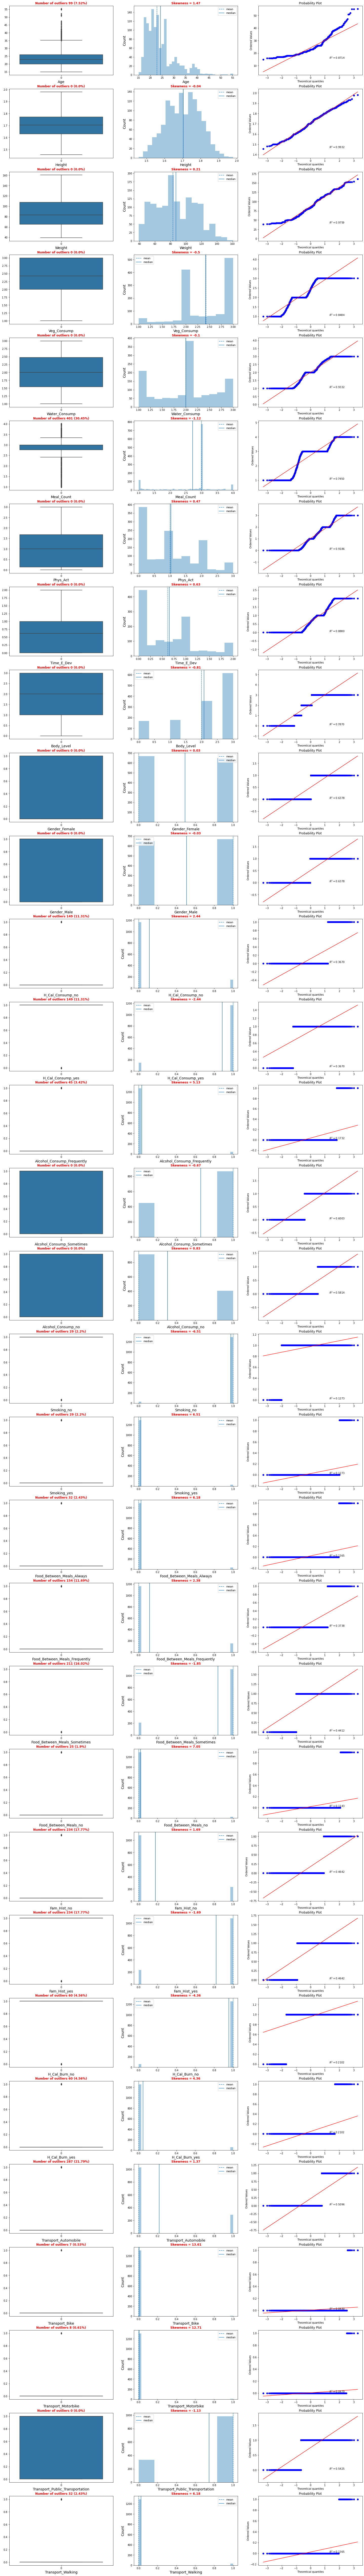

In [185]:
box_dist_prob_plots(df)

here we have imbalance data set we will try solve it but after training because may be not effect in model

(array([169.,   0.,   0., 178.,   0.,   0., 355.,   0.,   0., 615.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

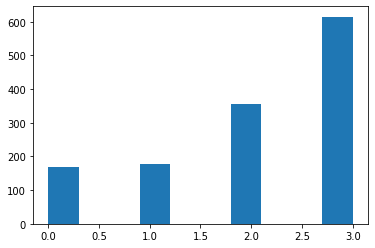

In [186]:
plt.hist(df["Body_Level"])

In [187]:
from collections import Counter
print(Counter(df["Body_Level"]))

Counter({3: 615, 2: 355, 1: 178, 0: 169})


X= features 
Y=label

In [188]:
X=df.iloc[:,:].copy()
Y=df["Body_Level"].copy()

X=X.drop(["Body_Level"],axis=1)




In [189]:
X.columns

Index(['Age', 'Height', 'Weight', 'Veg_Consump', 'Water_Consump', 'Meal_Count',
       'Phys_Act', 'Time_E_Dev', 'Gender_Female', 'Gender_Male',
       'H_Cal_Consump_no', 'H_Cal_Consump_yes', 'Alcohol_Consump_Frequently',
       'Alcohol_Consump_Sometimes', 'Alcohol_Consump_no', 'Smoking_no',
       'Smoking_yes', 'Food_Between_Meals_Always',
       'Food_Between_Meals_Frequently', 'Food_Between_Meals_Sometimes',
       'Food_Between_Meals_no', 'Fam_Hist_no', 'Fam_Hist_yes', 'H_Cal_Burn_no',
       'H_Cal_Burn_yes', 'Transport_Automobile', 'Transport_Bike',
       'Transport_Motorbike', 'Transport_Public_Transportation',
       'Transport_Walking'],
      dtype='object')

before start training i have body level and weight have high corr so i will check first feature importance if weight has high importance so we have 30 features we will remove them

Elapsed time to compute the importances: 0.003 seconds


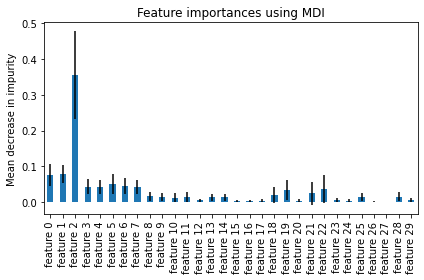

In [190]:
# feature importance 
import time
import pandas as pd
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)


start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")


forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

of course same i said weight has highest importance  we will check with another way to ensure 

pca told us one feature has variance 94% of course its weight so that is told us we should use regularization  or remove all features except weight

In [191]:
pca = PCA(n_components=.999)
x=pca.fit(X)
print(pca.explained_variance_ratio_)

x=pca.fit_transform(X)
print(x.shape)

[9.42437446e-01 5.17016929e-02 1.20500089e-03 7.96046701e-04
 6.86848089e-04 5.26352986e-04 4.88704455e-04 4.52941168e-04
 3.22468111e-04 3.00221239e-04 2.70583457e-04]
(1317, 11)


here we will try use regularization

In [192]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [193]:
X_train.shape

(1053, 30)

In [194]:
y_train.shape

(1053,)

In [195]:
svc=SVC()

svc.fit(X_train,y_train)

SVC()

In [196]:
y_predict=svc.predict(X_train)

accuracy = accuracy_score(y_train, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_predict))

Model accuracy is:  0.7597340930674265
              precision    recall  f1-score   support

           0       0.71      0.80      0.75       137
           1       0.53      0.41      0.47       145
           2       0.64      0.83      0.72       290
           3       0.95      0.81      0.88       481

    accuracy                           0.76      1053
   macro avg       0.71      0.71      0.70      1053
weighted avg       0.78      0.76      0.76      1053



In [197]:
y_predict=svc.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_predict))

Model accuracy is:  0.7992424242424242
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        32
           1       0.50      0.33      0.40        33
           2       0.66      0.83      0.73        65
           3       0.97      0.88      0.92       134

    accuracy                           0.80       264
   macro avg       0.72      0.73      0.71       264
weighted avg       0.80      0.80      0.80       264



first use svm with gamma .1 for regularization

In [198]:

svc=SVC(gamma=.1)

svc.fit(X_train,y_train)

SVC(gamma=0.1)

very good accuracy for train and test 

In [199]:
y_predict=svc.predict(X_train)

accuracy = accuracy_score(y_train, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_predict))

Model accuracy is:  0.9848053181386515
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       137
           1       0.99      0.92      0.95       145
           2       0.97      0.99      0.98       290
           3       1.00      1.00      1.00       481

    accuracy                           0.98      1053
   macro avg       0.98      0.98      0.98      1053
weighted avg       0.98      0.98      0.98      1053



In [200]:
y_predict=svc.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_predict))

Model accuracy is:  0.9393939393939394
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.67      0.80        33
           2       0.83      0.97      0.89        65
           3       0.98      0.98      0.98       134

    accuracy                           0.94       264
   macro avg       0.95      0.90      0.91       264
weighted avg       0.95      0.94      0.94       264



now decision tree 

In [201]:
from sklearn.tree import DecisionTreeClassifier
dTree_clf = DecisionTreeClassifier()
dTree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

we have also good result

In [202]:
y_pred2 = dTree_clf.predict(X_train)

accuracy = accuracy_score(y_train, y_pred2)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred2))

Model accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       145
           2       1.00      1.00      1.00       290
           3       1.00      1.00      1.00       481

    accuracy                           1.00      1053
   macro avg       1.00      1.00      1.00      1053
weighted avg       1.00      1.00      1.00      1053



In [203]:
y_pred2 = dTree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred2))

Model accuracy is:  0.9659090909090909
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.94      0.91      0.92        33
           2       0.93      0.97      0.95        65
           3       0.99      0.98      0.98       134

    accuracy                           0.97       264
   macro avg       0.96      0.96      0.96       264
weighted avg       0.97      0.97      0.97       264



xgboost now

In [204]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

the highest result 

In [205]:
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred))

Model accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       145
           2       1.00      1.00      1.00       290
           3       1.00      1.00      1.00       481

    accuracy                           1.00      1053
   macro avg       1.00      1.00      1.00      1053
weighted avg       1.00      1.00      1.00      1053



In [206]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))

Model accuracy is:  0.9848484848484849
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.97      0.94      0.95        33
           2       0.97      0.97      0.97        65
           3       0.99      1.00      1.00       134

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



In [207]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

LogisticRegression now

In [94]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)

In [95]:
y_pred =clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred))

Model accuracy is:  0.8290598290598291
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       137
           1       0.65      0.51      0.57       145
           2       0.76      0.79      0.78       290
           3       0.92      0.93      0.93       481

    accuracy                           0.83      1053
   macro avg       0.78      0.78      0.78      1053
weighted avg       0.82      0.83      0.83      1053



In [96]:
y_pred =clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))

Model accuracy is:  0.821969696969697
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        32
           1       0.62      0.45      0.53        33
           2       0.71      0.71      0.71        65
           3       0.91      0.94      0.92       134

    accuracy                           0.82       264
   macro avg       0.77      0.76      0.76       264
weighted avg       0.81      0.82      0.82       264



In [97]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=23,solver="newton-cg",C=.9,random_state=0).fit(X_train, y_train)

the loweest accuracy 

In [98]:
y_pred =clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred))

Model accuracy is:  0.899335232668566
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       137
           1       0.87      0.67      0.75       145
           2       0.85      0.90      0.87       290
           3       0.96      0.95      0.96       481

    accuracy                           0.90      1053
   macro avg       0.88      0.87      0.87      1053
weighted avg       0.90      0.90      0.90      1053



In [99]:
y_pred =clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))

Model accuracy is:  0.8863636363636364
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        32
           1       0.83      0.58      0.68        33
           2       0.80      0.85      0.82        65
           3       0.95      0.96      0.96       134

    accuracy                           0.89       264
   macro avg       0.86      0.84      0.84       264
weighted avg       0.89      0.89      0.88       264



above we said we have imbalance data sat so we will try to solve it using smote and run same models to see changes

In [100]:
from imblearn.over_sampling import SMOTE
print(Counter(y_train))
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
print(Counter(y_train))

Counter({3: 481, 2: 290, 1: 145, 0: 137})
Counter({0: 481, 3: 481, 1: 481, 2: 481})


svm more little higher

In [101]:
svc=SVC()

svc.fit(X_train,y_train)

SVC()

In [102]:
y_predict=svc.predict(X_train)
accuracy = accuracy_score(y_train, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_predict))

Model accuracy is:  0.7307692307692307
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       481
           1       0.62      0.50      0.55       481
           2       0.66      0.73      0.69       481
           3       0.95      0.80      0.87       481

    accuracy                           0.73      1924
   macro avg       0.74      0.73      0.73      1924
weighted avg       0.74      0.73      0.73      1924



In [103]:
y_predict=svc.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_predict))

Model accuracy is:  0.7916666666666666
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        32
           1       0.47      0.48      0.48        33
           2       0.66      0.74      0.70        65
           3       0.98      0.87      0.92       134

    accuracy                           0.79       264
   macro avg       0.71      0.75      0.73       264
weighted avg       0.81      0.79      0.80       264



In [104]:

svc=SVC(gamma=.1)

svc.fit(X_train,y_train)

SVC(gamma=0.1)

In [105]:
y_predict=svc.predict(X_train)
accuracy = accuracy_score(y_train, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_predict))

Model accuracy is:  0.9942827442827443
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       481
           1       0.99      0.99      0.99       481
           2       1.00      0.99      0.99       481
           3       1.00      1.00      1.00       481

    accuracy                           0.99      1924
   macro avg       0.99      0.99      0.99      1924
weighted avg       0.99      0.99      0.99      1924



In [106]:
y_predict=svc.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_predict))

Model accuracy is:  0.9393939393939394
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.89      0.76      0.82        33
           2       0.84      0.94      0.88        65
           3       0.99      0.97      0.98       134

    accuracy                           0.94       264
   macro avg       0.93      0.92      0.92       264
weighted avg       0.94      0.94      0.94       264



also more little higher

In [107]:
dTree_clf = DecisionTreeClassifier()
dTree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [108]:
y_pred2 = dTree_clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred2)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred2))

Model accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       481
           1       1.00      1.00      1.00       481
           2       1.00      1.00      1.00       481
           3       1.00      1.00      1.00       481

    accuracy                           1.00      1924
   macro avg       1.00      1.00      1.00      1924
weighted avg       1.00      1.00      1.00      1924



In [109]:
y_pred2 = dTree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred2))

Model accuracy is:  0.9507575757575758
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.79      0.94      0.86        33
           2       0.95      0.89      0.92        65
           3       0.99      0.99      0.99       134

    accuracy                           0.95       264
   macro avg       0.93      0.94      0.93       264
weighted avg       0.95      0.95      0.95       264



here increase in test 1% so not bad and still the highest

In [110]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [111]:
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred))

Model accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       481
           1       1.00      1.00      1.00       481
           2       1.00      1.00      1.00       481
           3       1.00      1.00      1.00       481

    accuracy                           1.00      1924
   macro avg       1.00      1.00      1.00      1924
weighted avg       1.00      1.00      1.00      1924



In [112]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))

Model accuracy is:  0.9848484848484849
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.97      0.94      0.95        33
           2       0.96      0.98      0.97        65
           3       1.00      0.99      1.00       134

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.99      0.98      0.98       264



more little higher

In [113]:
clf = LogisticRegression().fit(X_train, y_train)

In [114]:
y_pred =clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred))

Model accuracy is:  0.8144490644490644
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       481
           1       0.75      0.70      0.73       481
           2       0.73      0.78      0.76       481
           3       0.91      0.86      0.89       481

    accuracy                           0.81      1924
   macro avg       0.82      0.81      0.81      1924
weighted avg       0.82      0.81      0.81      1924



In [115]:
y_pred =clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))

Model accuracy is:  0.8295454545454546
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        32
           1       0.65      0.39      0.49        33
           2       0.70      0.82      0.75        65
           3       0.95      0.91      0.93       134

    accuracy                           0.83       264
   macro avg       0.77      0.77      0.76       264
weighted avg       0.83      0.83      0.82       264



In [116]:
clf = LogisticRegression(solver="newton-cg",C=.9,random_state=0).fit(X_train, y_train)

In [117]:
y_pred =clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred))

Model accuracy is:  0.9287941787941788
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       481
           1       0.93      0.87      0.90       481
           2       0.89      0.93      0.91       481
           3       0.97      0.94      0.95       481

    accuracy                           0.93      1924
   macro avg       0.93      0.93      0.93      1924
weighted avg       0.93      0.93      0.93      1924



In [118]:
y_pred =clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))

Model accuracy is:  0.8863636363636364
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        32
           1       0.80      0.61      0.69        33
           2       0.80      0.85      0.82        65
           3       0.96      0.96      0.96       134

    accuracy                           0.89       264
   macro avg       0.85      0.84      0.84       264
weighted avg       0.89      0.89      0.88       264



**PCA 2 features**

In [119]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

In [120]:
svc=SVC()

svc.fit(X_train,y_train)

SVC()

In [121]:
y_predict=svc.predict(X_train)

accuracy = accuracy_score(y_train, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_predict))

Model accuracy is:  0.7834757834757835
              precision    recall  f1-score   support

           0       0.73      0.93      0.82       137
           1       0.66      0.35      0.46       145
           2       0.64      0.88      0.74       290
           3       0.97      0.81      0.88       481

    accuracy                           0.78      1053
   macro avg       0.75      0.74      0.73      1053
weighted avg       0.80      0.78      0.78      1053



In [122]:
y_predict=svc.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_predict))

Model accuracy is:  0.8371212121212122
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        32
           1       0.71      0.30      0.43        33
           2       0.69      0.92      0.79        65
           3       0.98      0.90      0.94       134

    accuracy                           0.84       264
   macro avg       0.79      0.77      0.75       264
weighted avg       0.85      0.84      0.83       264



first use svm with gamma .1 for regularization

In [123]:

svc=SVC(gamma=.1)

svc.fit(X_train,y_train)

SVC(gamma=0.1)

very good accuracy for train and test 

In [124]:
y_predict=svc.predict(X_train)

accuracy = accuracy_score(y_train, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_predict))

Model accuracy is:  0.9715099715099715
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       137
           1       0.97      0.85      0.90       145
           2       0.95      0.97      0.96       290
           3       0.99      1.00      1.00       481

    accuracy                           0.97      1053
   macro avg       0.97      0.96      0.96      1053
weighted avg       0.97      0.97      0.97      1053



In [125]:
y_predict=svc.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_predict))

Model accuracy is:  0.9393939393939394
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      0.67      0.80        33
           2       0.84      0.97      0.90        65
           3       0.98      0.98      0.98       134

    accuracy                           0.94       264
   macro avg       0.94      0.90      0.91       264
weighted avg       0.95      0.94      0.94       264



now decision tree 

In [126]:
from sklearn.tree import DecisionTreeClassifier
dTree_clf = DecisionTreeClassifier()
dTree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

we have also good result

In [127]:
y_pred2 = dTree_clf.predict(X_train)

accuracy = accuracy_score(y_train, y_pred2)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred2))

Model accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       145
           2       1.00      1.00      1.00       290
           3       1.00      1.00      1.00       481

    accuracy                           1.00      1053
   macro avg       1.00      1.00      1.00      1053
weighted avg       1.00      1.00      1.00      1053



In [128]:
y_pred2 = dTree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred2))

Model accuracy is:  0.8825757575757576
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.77      0.61      0.68        33
           2       0.75      0.83      0.79        65
           3       0.96      0.96      0.96       134

    accuracy                           0.88       264
   macro avg       0.86      0.84      0.85       264
weighted avg       0.88      0.88      0.88       264



xgboost now

In [129]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

the highest result 

In [130]:
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred))

Model accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       145
           2       1.00      1.00      1.00       290
           3       1.00      1.00      1.00       481

    accuracy                           1.00      1053
   macro avg       1.00      1.00      1.00      1053
weighted avg       1.00      1.00      1.00      1053



In [131]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))

Model accuracy is:  0.9166666666666666
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        32
           1       0.87      0.61      0.71        33
           2       0.83      0.91      0.87        65
           3       0.97      0.99      0.98       134

    accuracy                           0.92       264
   macro avg       0.90      0.87      0.87       264
weighted avg       0.92      0.92      0.91       264



LogisticRegression now

In [132]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)

In [133]:
y_pred =clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred))

Model accuracy is:  0.8575498575498576
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       137
           1       0.72      0.57      0.64       145
           2       0.81      0.83      0.82       290
           3       0.94      0.95      0.94       481

    accuracy                           0.86      1053
   macro avg       0.82      0.81      0.81      1053
weighted avg       0.85      0.86      0.85      1053



In [134]:
y_pred =clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))

Model accuracy is:  0.8636363636363636
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        32
           1       0.82      0.55      0.65        33
           2       0.75      0.78      0.77        65
           3       0.92      0.96      0.94       134

    accuracy                           0.86       264
   macro avg       0.84      0.81      0.82       264
weighted avg       0.86      0.86      0.86       264



In [135]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=23,solver="newton-cg",C=.9,random_state=0).fit(X_train, y_train)

the loweest accuracy 

In [136]:
y_pred =clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred))

Model accuracy is:  0.8603988603988604
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       137
           1       0.71      0.59      0.65       145
           2       0.81      0.84      0.82       290
           3       0.94      0.95      0.95       481

    accuracy                           0.86      1053
   macro avg       0.82      0.82      0.82      1053
weighted avg       0.86      0.86      0.86      1053



In [137]:
y_pred =clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))

Model accuracy is:  0.8674242424242424
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.78      0.55      0.64        33
           2       0.77      0.83      0.80        65
           3       0.93      0.96      0.94       134

    accuracy                           0.87       264
   macro avg       0.84      0.81      0.82       264
weighted avg       0.87      0.87      0.86       264



above we said we have imbalance data sat so we will try to solve it using smote and run same models to see changes

In [138]:
from imblearn.over_sampling import SMOTE
print(Counter(y_train))
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
print(Counter(y_train))

Counter({3: 481, 2: 290, 1: 145, 0: 137})
Counter({0: 481, 3: 481, 1: 481, 2: 481})


In [139]:
svc=SVC()

svc.fit(X_train,y_train)

SVC()

In [140]:
y_predict=svc.predict(X_train)
accuracy = accuracy_score(y_train, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_predict))

Model accuracy is:  0.7744282744282744
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       481
           1       0.69      0.60      0.65       481
           2       0.69      0.73      0.71       481
           3       0.96      0.80      0.87       481

    accuracy                           0.77      1924
   macro avg       0.78      0.77      0.77      1924
weighted avg       0.78      0.77      0.77      1924



In [141]:
y_predict=svc.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_predict))

Model accuracy is:  0.8068181818181818
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        32
           1       0.54      0.58      0.56        33
           2       0.66      0.72      0.69        65
           3       0.98      0.86      0.92       134

    accuracy                           0.81       264
   macro avg       0.74      0.79      0.76       264
weighted avg       0.82      0.81      0.81       264



svm more little higher

In [142]:

svc=SVC(gamma=.1)

svc.fit(X_train,y_train)

SVC(gamma=0.1)

In [143]:
y_predict=svc.predict(X_train)
accuracy = accuracy_score(y_train, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_predict))

Model accuracy is:  0.9875259875259875
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       481
           1       0.99      0.97      0.98       481
           2       0.98      0.99      0.98       481
           3       1.00      1.00      1.00       481

    accuracy                           0.99      1924
   macro avg       0.99      0.99      0.99      1924
weighted avg       0.99      0.99      0.99      1924



In [144]:
y_predict=svc.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_predict))

Model accuracy is:  0.9356060606060606
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       0.86      0.73      0.79        33
           2       0.85      0.92      0.88        65
           3       0.99      0.98      0.98       134

    accuracy                           0.94       264
   macro avg       0.92      0.91      0.91       264
weighted avg       0.94      0.94      0.93       264



also more little higher

In [145]:
dTree_clf = DecisionTreeClassifier()
dTree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [146]:
y_pred2 = dTree_clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred2)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred2))

Model accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       481
           1       1.00      1.00      1.00       481
           2       1.00      1.00      1.00       481
           3       1.00      1.00      1.00       481

    accuracy                           1.00      1924
   macro avg       1.00      1.00      1.00      1924
weighted avg       1.00      1.00      1.00      1924



In [147]:
y_pred2 = dTree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred2))

Model accuracy is:  0.8560606060606061
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        32
           1       0.59      0.70      0.64        33
           2       0.78      0.77      0.78        65
           3       0.96      0.96      0.96       134

    accuracy                           0.86       264
   macro avg       0.81      0.80      0.80       264
weighted avg       0.86      0.86      0.86       264



here increase in test 1% so not bad and still the highest

In [148]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [149]:
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred))

Model accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       481
           1       1.00      1.00      1.00       481
           2       1.00      1.00      1.00       481
           3       1.00      1.00      1.00       481

    accuracy                           1.00      1924
   macro avg       1.00      1.00      1.00      1924
weighted avg       1.00      1.00      1.00      1924



In [150]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))

Model accuracy is:  0.9204545454545454
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.83      0.73      0.77        33
           2       0.82      0.86      0.84        65
           3       0.97      0.98      0.97       134

    accuracy                           0.92       264
   macro avg       0.91      0.89      0.90       264
weighted avg       0.92      0.92      0.92       264



more little higher

In [151]:
clf = LogisticRegression().fit(X_train, y_train)

In [152]:
y_pred =clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred))

Model accuracy is:  0.8321205821205822
              precision    recall  f1-score   support

           0       0.82      0.91      0.87       481
           1       0.78      0.68      0.73       481
           2       0.79      0.83      0.81       481
           3       0.93      0.91      0.92       481

    accuracy                           0.83      1924
   macro avg       0.83      0.83      0.83      1924
weighted avg       0.83      0.83      0.83      1924



In [153]:
y_pred =clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))

Model accuracy is:  0.8446969696969697
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        32
           1       0.66      0.58      0.61        33
           2       0.75      0.75      0.75        65
           3       0.94      0.93      0.94       134

    accuracy                           0.84       264
   macro avg       0.79      0.80      0.79       264
weighted avg       0.84      0.84      0.84       264



In [154]:
clf = LogisticRegression(solver="newton-cg",C=.9,random_state=0).fit(X_train, y_train)

In [155]:
y_pred =clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_train,y_pred))

Model accuracy is:  0.8321205821205822
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       481
           1       0.76      0.69      0.72       481
           2       0.80      0.84      0.82       481
           3       0.95      0.91      0.93       481

    accuracy                           0.83      1924
   macro avg       0.83      0.83      0.83      1924
weighted avg       0.83      0.83      0.83      1924



In [156]:
y_pred =clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))

Model accuracy is:  0.8560606060606061
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.67      0.61      0.63        33
           2       0.75      0.80      0.78        65
           3       0.95      0.93      0.94       134

    accuracy                           0.86       264
   macro avg       0.81      0.81      0.81       264
weighted avg       0.86      0.86      0.86       264

